# PROJET 5 - SEGMENTATION DE CLIENTS D'UN SITE DE E-COMMERCE
## ESSAIS SEGMENTATION
***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats as st
import re
from matplotlib.patches import Patch

from sklearn.metrics import silhouette_score

In [12]:
#on récupère nos données

data = pd.read_csv('data/data_clients_rs.csv')

features = ['montant', 'nb_achats', 'recence']
features_rs = ['montant', 'nb_achats', 'recence', 'satisfaction']

In [8]:
data.head()

,montant,nb_achats,recence,satisfaction
0,141.90,1,115.92,5.0
1,27.19,1,118.91,4.0
2,86.22,1,541.46,3.0
3,43.62,1,325.53,4.0
4,196.89,1,292.51,5.0


## 1 - FEATURE ENGENEERING
***

In [14]:
#on cree une feature correspond au prix moyen des produits achetés par le client

data['prix_moyen_achat'] = data['montant'] / data['nb_achats']

In [19]:
#on crée une feature satisfaction pondérée par le nombre d'achats

data['montant_satisfaction'] = data['montant'] * data['satisfaction']

In [20]:
data['recence'].describe()

count    94721.000000
mean       243.070916
std        153.166474
min          0.000000
25%        118.850000
50%        223.620000
75%        352.410000
max        728.490000
Name: recence, dtype: float64

In [21]:
#on cree une variable fréquence des achats

data['frequence_achats'] = data['nb_achats'] / (data['recence'] + 1)

In [24]:
#on pose nos features

features_rfm = ['montant', 'recence', 'nb_achats']
features_rs = ['montant', 'recence', 'nb_achats', 'satisfaction']
features_all = data.columns.tolist()

## 2 - KMEANS
***

In [86]:
list_2_std_rs = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10)
    #Données standardisées
    kmeans.fit(X_std_rs)
    list_2_std_rs.append(kmeans.inertia_)

In [89]:
distortions_std_rs = list_2_std_rs

In [87]:
list_2_std_rs

[301112.8741806211,
 244471.5398120095,
 194154.48090900877,
 144944.45790400868,
 130808.14151127759,
 117328.68053204415,
 105840.91549210489,
 98608.90045179533,
 89741.09198884129,
 84538.7190068843]

In [26]:
#Calcul des scores pour déterminer le nombre de clusters optimal

distortions_rfm = []
distortions_rs = []
distortions_all = []
distortions_std_rfm = []
distortions_std_rs = []
distortions_std_all = []

silhouette_scores_rfm = []
silhouette_scores_rs = []
silhouette_scores_all = []
silhouette_scores_std_rfm = []
silhouette_scores_std_rs = []
silhouette_scores_std_all = []

#On instancie un scaler
scaler = StandardScaler()

#On pose nos données
X_rfm = data[features_rfm].values
X_rs = data[features_rs].values
X_all = data[features_all].values

X_std_rfm = scaler.fit_transform(X_rfm)
X_std_rs = scaler.fit_transform(X_rs)
X_std_all = scaler.fit_transform(X_all)

k_range = [k for k in range(2,12)]

for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10)
    
    #Ajustement du kmeans sur les données sans satisfaction
    #Données originales
    kmeans.fit(X_rfm)
    labels_rfm = kmeans.predict(X_rfm)
    distortions_rfm.append(kmeans.inertia_)
    silhouette_scores_rfm.append(silhouette_score(X_rfm, labels_rfm))
    
    #Données standardisées
    kmeans.fit(X_std_rfm)
    labels_std_rfm = kmeans.predict(X_std_rfm)
    distortions_std_rfm.append(kmeans.inertia_)
    silhouette_scores_std_rfm.append(silhouette_score(X_std, labels_std))
    
    
    #Ajustement du kmeans sur les données avec satisfaction
    #Données originales
    kmeans.fit(X_rs)
    labels_rs = kmeans.predict(X_rs)
    distortions_rs.append(kmeans.inertia_)
    silhouette_scores_rs.append(silhouette_score(X_rs, labels_rs))
    
    #Données standardisées
    kmeans.fit(X_std_rs)
    labels_std_rs = kmeans.predict(X_std_rs)
    distortions_std_rs.append(kmeans.inertia_)
    silhouette_scores_std_rs.append(silhouette_score(X_std_rs, labels_std_rs))

    #Ajustement du kmeans sur les données avec satisfaction et les variables supplémentaires
    #Données originales
    kmeans.fit(X_all)
    labels_all = kmeans.predict(X_all)
    distortions_all.append(kmeans.inertia_)
    silhouette_scores_all.append(silhouette_score(X_all, labels_all))
    
    #Données standardisées
    kmeans.fit(X_std_all)
    labels_std_all = kmeans.predict(X_std_all)
    distortions_std_all.append(kmeans.inertia_)
    silhouette_scores_std_all.append(silhouette_score(X_std_all, labels_std_all))

In [90]:
#on rassemble tout cela dans un dataframe

df_kmeans = pd.DataFrame({
    'n_clusters': k_range, 
    'dist_rfm' : distortions_rfm, 
    'silhouette_rfm': silhouette_scores_rfm,
    'dist_rs': distortions_rs,
    'silhouette_rs': silhouette_scores_rs,
    'dist_all': distortions_all, 
    'silhouette_all': silhouette_scores_all,
    'dist_rfm_std': distortions_std_rfm,
    'silhouette_rfm_std': silhouette_scores_std_rfm,
    'dist_rs_std': distortions_std_rs,
    'silhouette_rs_std': silhouette_scores_std_rs,
    'dist_all_std': distortions_std_all,
    'silhouette_all_std': silhouette_scores_std_all
})

#on le sauvegarde
df_kmeans.to_csv('data_kmeans.csv', index = False)

In [83]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

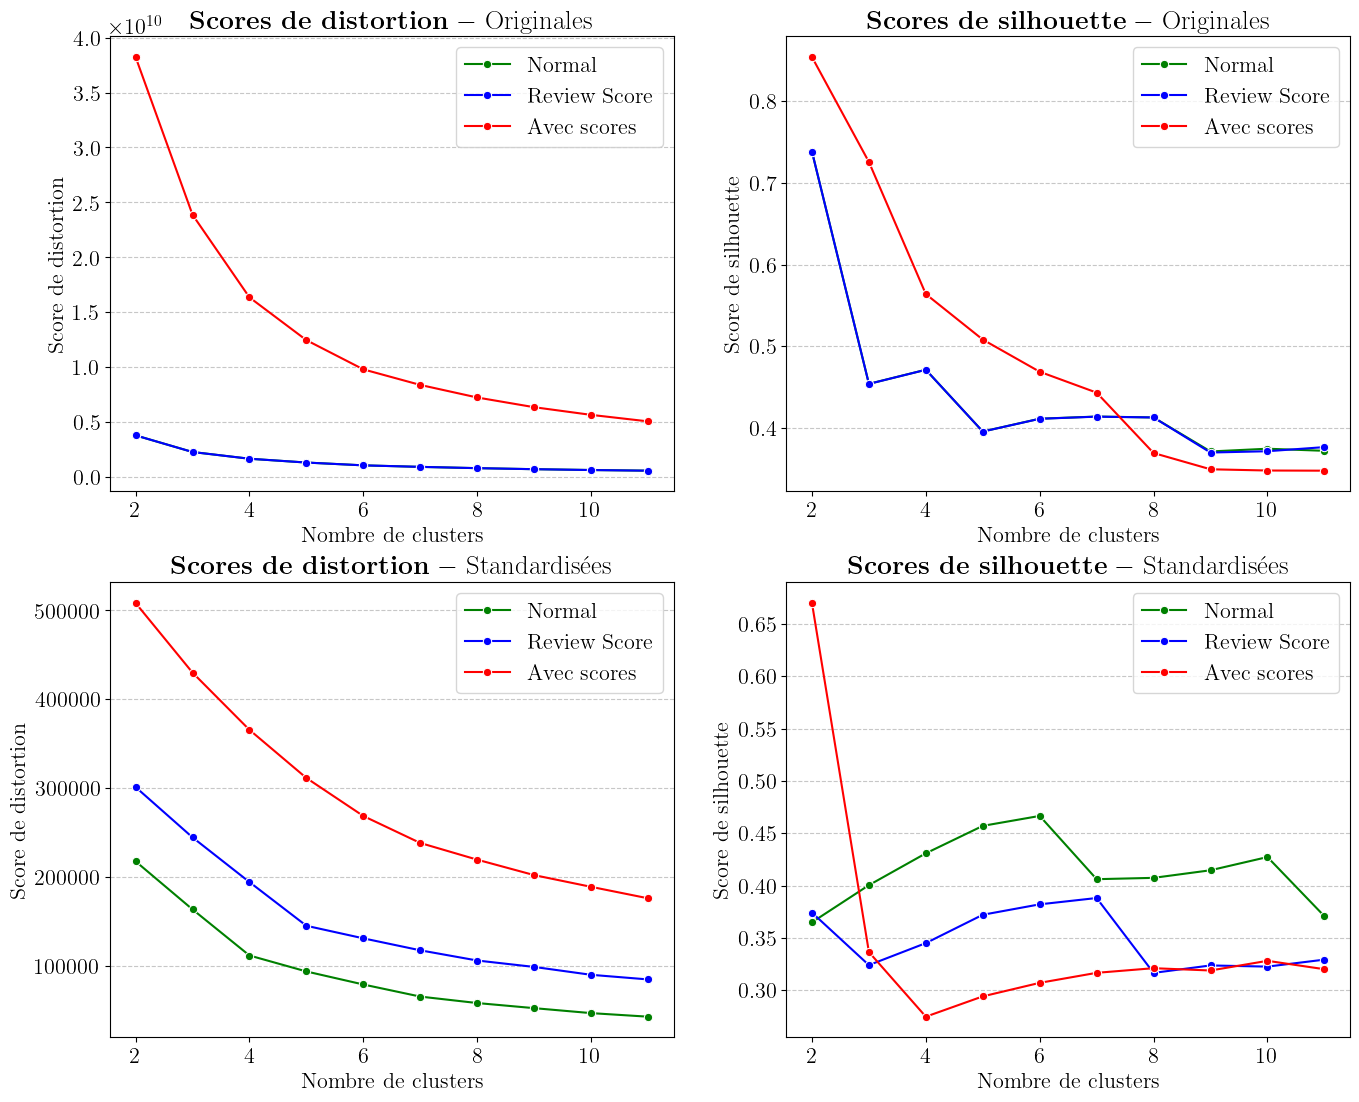

In [92]:
#Affichage du plot des scores
fig, axes = plt.subplots(2,2, figsize = (16,13), gridspec_kw={'width_ratios':[1,1]})


#Scores de distortions
sns.lineplot(x = k_range, y = distortions_rfm, marker = 'o', color = 'green', ax = axes[0,0], label = 'Normal')
sns.lineplot(x = k_range, y = distortions_rs, marker = 'o', color = 'blue', ax = axes[0,0], label = 'Review Score')
sns.lineplot(x = k_range, y = distortions_all, marker = 'o', color = 'red', ax = axes[0,0], label = 'Avec scores')

sns.lineplot(x = k_range, y = distortions_std_rfm, marker = 'o', color = 'green', ax = axes[1,0], label = 'Normal')
sns.lineplot(x = k_range, y = distortions_std_rs, marker = 'o', color = 'blue', ax = axes[1,0], label = 'Review Score')
sns.lineplot(x = k_range, y = distortions_std_all, marker = 'o', color = 'red', ax = axes[1,0], label = 'Avec scores')

#Scores de silhouette
sns.lineplot(x = k_range, y = silhouette_scores_rfm, marker = 'o', color = 'green', ax = axes[0,1], label = 'Normal')
sns.lineplot(x = k_range, y = silhouette_scores_rs, marker = 'o', color = 'blue', ax = axes[0,1], label = 'Review Score')
sns.lineplot(x = k_range, y = silhouette_scores_all, marker = 'o', color = 'red', ax = axes[0,1], label = 'Avec scores')

sns.lineplot(x = k_range, y = silhouette_scores_std_rfm, marker = 'o', color = 'green', ax = axes[1,1], label = 'Normal')
sns.lineplot(x = k_range, y = silhouette_scores_std_rs, marker = 'o', color = 'blue', ax = axes[1,1], label = 'Review Score')
sns.lineplot(x = k_range, y = silhouette_scores_std_all, marker = 'o', color = 'red', ax = axes[1,1], label = 'Avec scores')

axes[0,0].set_title(f"\\textbf{{Scores de distortion}} $-$ Originales")
axes[0,1].set_title(f"\\textbf{{Scores de silhouette}} $-$ Originales")
axes[1,0].set_title(f"\\textbf{{Scores de distortion}} $-$ Standardisées")
axes[1,1].set_title(f"\\textbf{{Scores de silhouette}} $-$ Standardisées")
axes[0,0].set_xlabel(f"Nombre de clusters")
axes[0,0].set_ylabel(f"Score de distortion")
axes[0,1].set_xlabel(f"Nombre de clusters")
axes[0,1].set_ylabel(f"Score de silhouette")
axes[1,0].set_xlabel(f"Nombre de clusters")
axes[1,0].set_ylabel(f"Score de distortion")
axes[1,1].set_xlabel(f"Nombre de clusters")
axes[1,1].set_ylabel(f"Score de silhouette")
axes[0,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0,1].grid(axis='y', linestyle='--', alpha = 0.7)
axes[1,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1,1].grid(axis='y', linestyle='--', alpha = 0.7)
plt.legend()
plt.savefig(f"silhouette_scores_kmeans.pdf", bbox_inches='tight')
plt.show()

In [24]:
#On part donc sur 6 clusters avec les données standardisées et sans le score de satisfaction

kmeans = KMeans(n_clusters = 6, n_init = 10)

#kmeans.fit(data[features].values)
kmeans_labels_std = kmeans.fit_predict(X_std)

In [26]:
#On ajoute les labels au dataframe

data['kmeans_labels_std'] = kmeans_labels_std

In [105]:
#On affiche les distributions par groupe

#for feature in features_rs:
#    palette = ['peru', 'silver', 'yellowgreen', 'teal']
#    fig, axes = plt.subplots(2,2, figsize = (14,12), gridspec_kw={'width_ratios':[1,1]})
#    for i, group in enumerate(data['kmeans_labels'].sort_values().unique()):
#        x = data.loc[data['kmeans_labels'] == group, feature]
#        sns.kdeplot(data = x, fill = True , alpha = 0.6, bw_adjust = 1.5, label = f"Groupe {group + 1}", color = palette[i], ax = axes[i//2, i%2], legend = True)
#        axes[i//2,i%2].set_xlabel('')
#        axes[i//2,i%2].set_ylabel('')
#        axes[i//2, i%2].legend()
#    fig.suptitle(f"\\textbf{{Distribution de {feature.capitalize().replace('_', ' ')} $-$ Normal}}", fontsize = 24)
#    plt.show()
#    print('_' * 130)
#    print('\n')

Distribution des features par clusters sans la satisfaction
________________________________________________________________________________


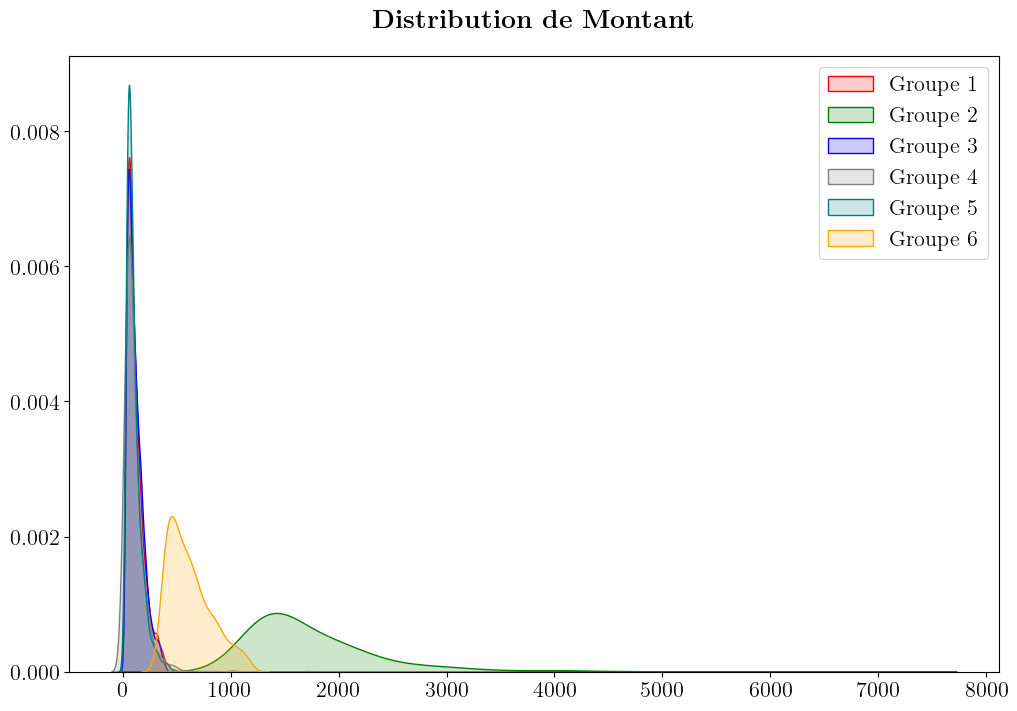

____________________________________________________________________________________________________




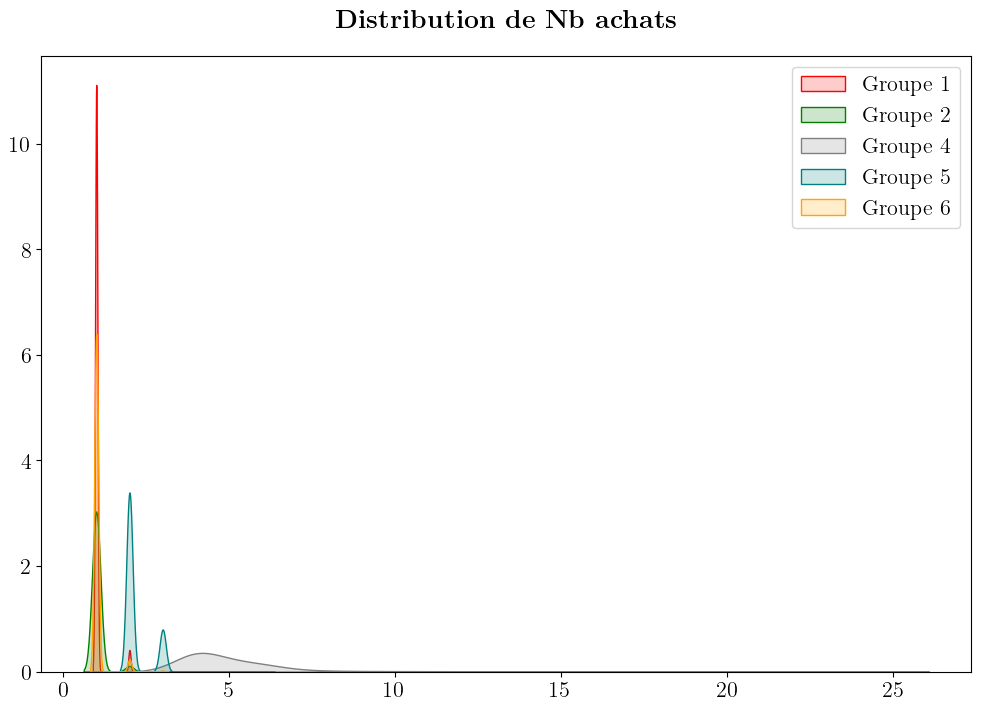

____________________________________________________________________________________________________




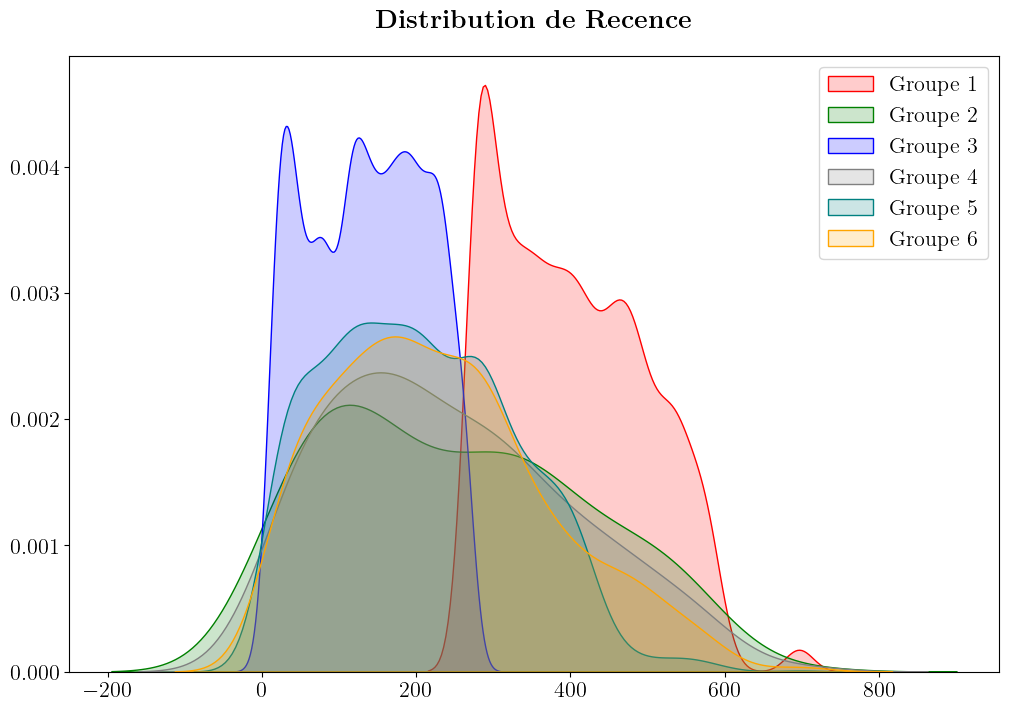

____________________________________________________________________________________________________




In [36]:
print("Distribution des features par clusters sans la satisfaction")
print('_' * 80)

for feature in features:
    palette = ['red', 'green', 'blue', 'grey', 'teal', 'orange']
    plt.figure(figsize=(12,8))
    for i, group in enumerate(data['kmeans_labels_std'].sort_values().unique()):
        x = data.loc[data['kmeans_labels_std'] == group, feature]
        sns.kdeplot(data = x, fill = True , alpha = 0.2, bw_adjust = 1.5, label = f"Groupe {group + 1}", color = palette[i], legend = True, warn_singular = False)
    plt.title(f"\\textbf{{Distribution de {feature.capitalize().replace('_', ' ')}}}", pad = 20)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.savefig(f"dist_kmeans1_{feature.replace('_','')}.pdf", bbox_inches='tight')
    plt.show()
    print('_' * 100)
    print('\n')

Boxplots des features sans la satisfaction
________________________________________________________________________________


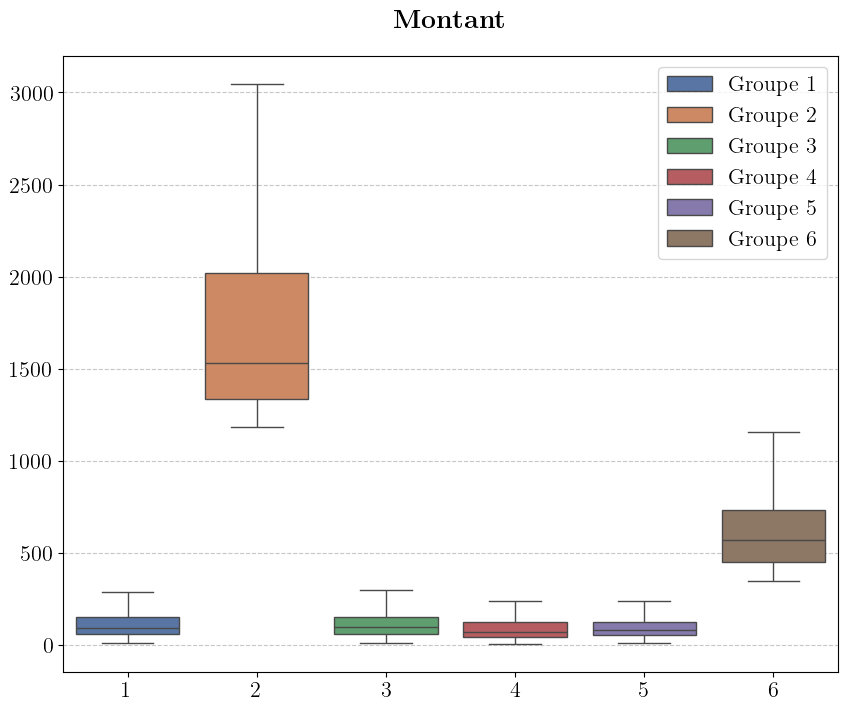

__________________________________________________________________________________________




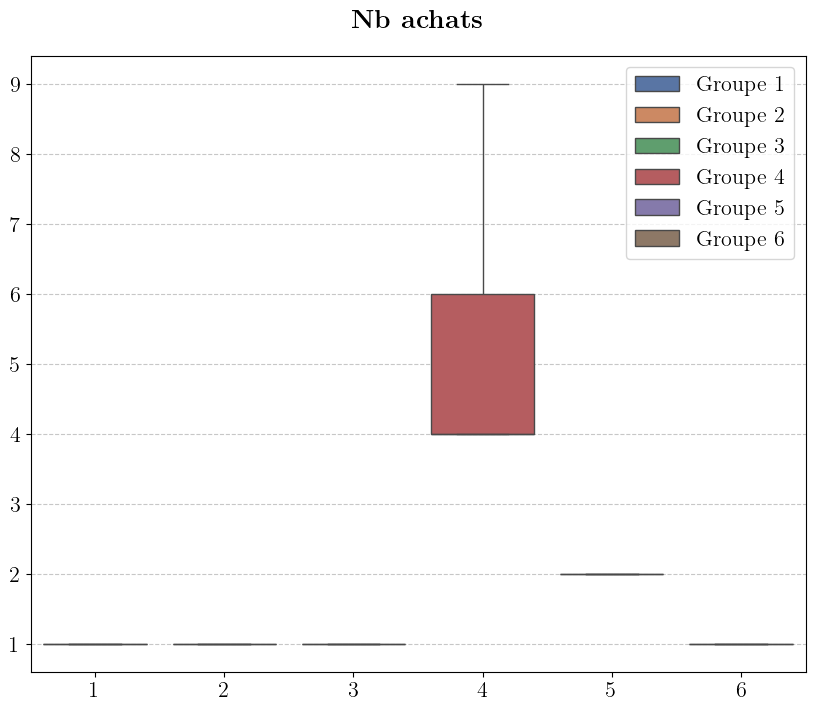

__________________________________________________________________________________________




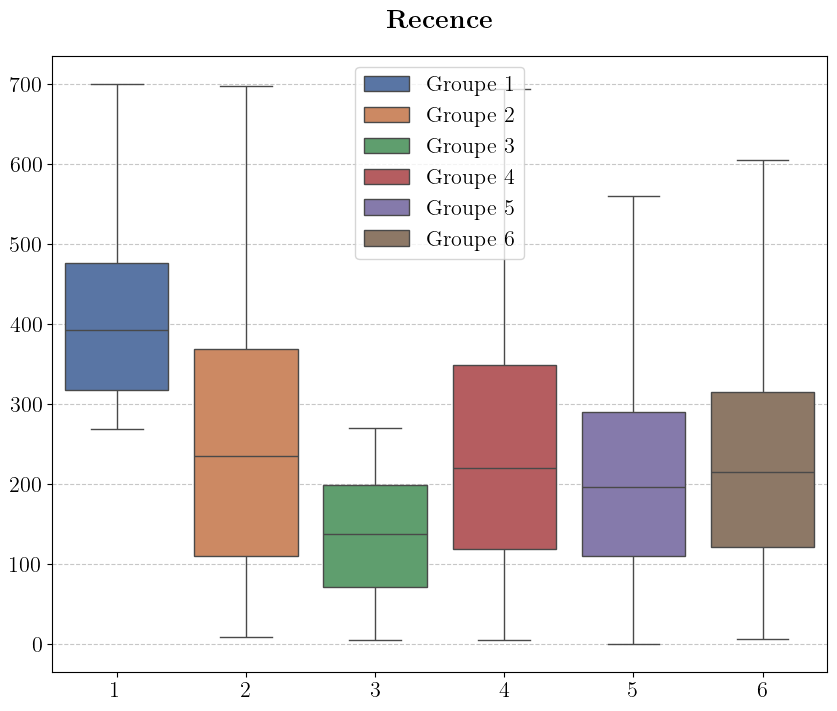

__________________________________________________________________________________________




In [40]:
#On affiche les boîtes à moustaches en complément

mean_marker_props = {'marker': 's', 'markerfacecolor': 'black', 'markeredgecolor': 'black', 'markersize': 8}

print("Boxplots des features sans la satisfaction")
print('_' * 80)

for feature in features:
    plt.figure(figsize = (10,  8))
    sns.boxplot(x = [label + 1 for label in data['kmeans_labels_std']], y=feature, data=data, showfliers = False, hue = [f"Groupe" + ' ' + str(label + 1) for label in data['kmeans_labels_std']], palette = 'deep')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f"\\textbf{{{feature.capitalize().replace('_', ' ')}}}", pad = 20)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f"boxplot_kmeans1_{feature.replace('_','')}.pdf", bbox_inches='tight')
    plt.show()
    print('_' * 90)
    print('\n')

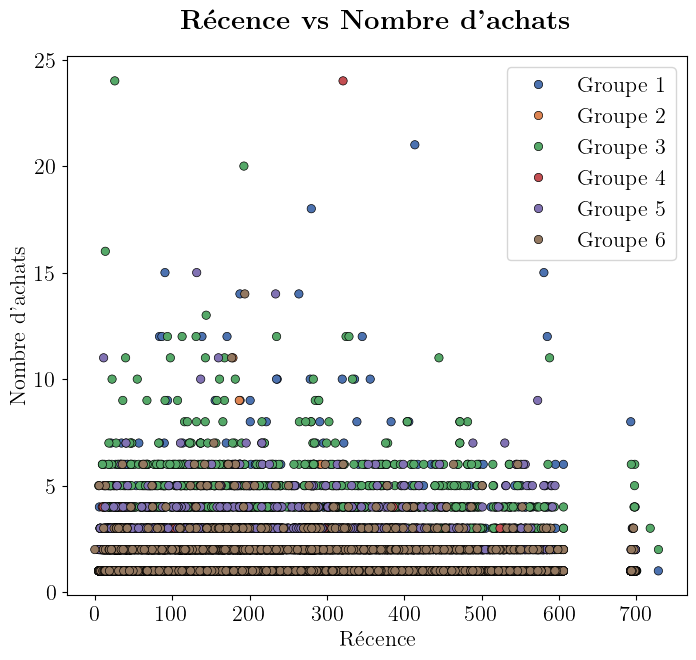

In [76]:
#Nuage de points recence vs nb_achats
plt.figure(figsize=(8,7))
#fig, axes = plt.subplots(1,2, figsize = (8,8), gridspec_kw={'width_ratios':[1,1]})
sns.scatterplot(x = data['recence'], y = data['nb_achats'], hue = [f"Groupe" + ' ' + str(label + 1) for label in data['kmeans_labels_std'].sort_values()], palette = 'deep', edgecolor = 'black')
#sns.scatterplot(x = data['recence'], y = data['nb_achats'], hue = [f"Groupe" + ' ' + str(label + 1) for label in data['kmeans_labels_rs'].sort_values()], palette = 'deep', edgecolor = 'black', ax = axes[1])
#axes[0].set_xlabel('Récence')
#axes[1].set_xlabel('Récence')
#axes[0].set_ylabel("Nombre d'achats")
#axes[1].set_ylabel("Nombre d'achats")
#axes[0].set_title("\\textbf{{Sans Satisfaction}}", pad = 10)
#axes[1].set_title("\\textbf{{Avec Satisfaction}}", pad = 10)
plt.xlabel('Récence')
plt.ylabel("Nombre d'achats")
plt.title(f"\\textbf{{Récence vs Nombre d'achats}}", fontsize = 20, pad = 20)
plt.savefig(f"scatter_kmeans_recence_vs_nbachats.pdf", bbox_inches='tight')
plt.show()

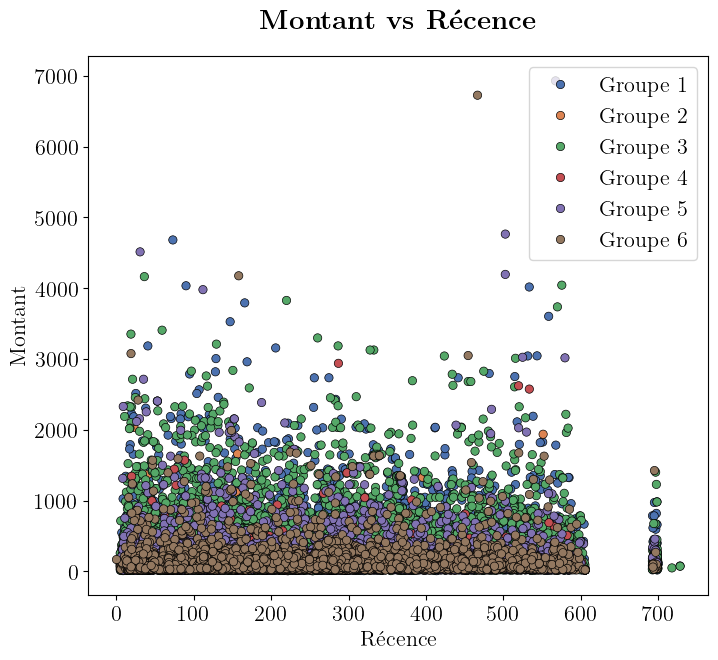

In [88]:
#Nuage de points montant vs recence

plt.figure(figsize = (8,7))
#fig, axes = plt.subplots(1,2, figsize = (16,7), gridspec_kw={'width_ratios':[1,1]})
sns.scatterplot(x = data['recence'], y = data['montant'], hue = [f"Groupe" + ' ' + str(label + 1) for label in data['kmeans_labels_std'].sort_values()], palette = 'deep', edgecolor = 'black')
#sns.scatterplot(x = data['recence'], y = data['montant'], hue = [f"Groupe" + ' ' + str(label + 1) for label in data['kmeans_labels_rs'].sort_values()], palette = 'deep', edgecolor = 'black', ax = axes[1])
plt.xlabel('Récence')
plt.ylabel('Montant')
axes[1].set_ylabel('Montant')
plt.title(f"\\textbf{{Montant vs Récence}}", fontsize = 20, pad = 20)
plt.savefig(f"scatter_kmeans_recence_vs_montant.pdf", bbox_inches='tight')
plt.show()

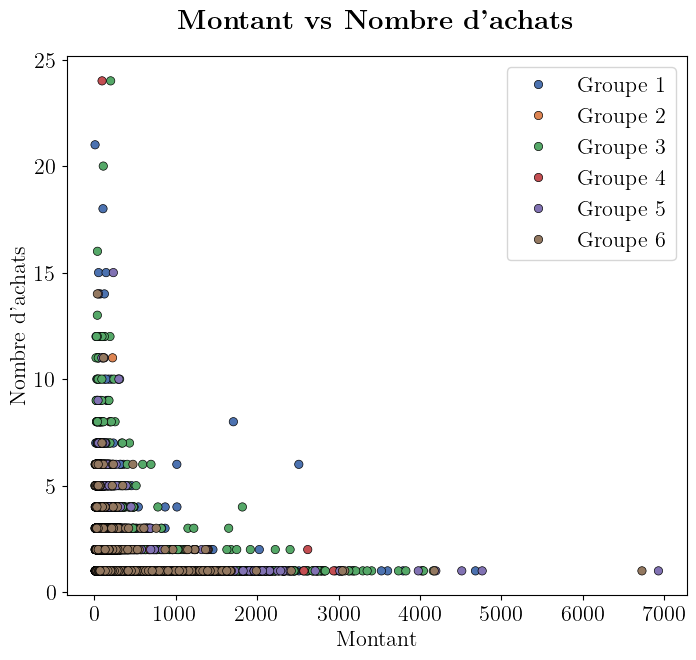

In [92]:
#Nuage de points montant vs nb_achats

plt.figure(figsize = (8,7))
#fig, axes = plt.subplots(1,2, figsize = (16,7), gridspec_kw={'width_ratios':[1,1]})
sns.scatterplot(x = data['montant'], y = data['nb_achats'], hue = [f"Groupe" + ' ' + str(label + 1) for label in data['kmeans_labels_std'].sort_values()], palette = 'deep', edgecolor = 'black')
#sns.scatterplot(x = data['montant'], y = data['nb_achats'], hue = [f"Groupe" + ' ' + str(label + 1) for label in data['kmeans_labels_rs'].sort_values()], palette = 'deep', edgecolor = 'black', ax = axes[1])
plt.xlabel("Montant")
plt.ylabel("Nombre d'achats")
plt.title(f"\\textbf{{Montant vs Nombre d'achats}}", fontsize = 20, pad = 20)
plt.savefig(f"scatter_kmeans_montant_vs_nbachats.pdf", bbox_inches='tight')
plt.show()

## 3 - DBSCAN
***

In [33]:
from sklearn.cluster import DBSCAN

In [35]:
#On isole nos features

X = data[features_rs].sample(n = 5000, random_state = 42)

#On standardise nos données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:,:3])
X_scaled_rs = scaler.fit_transform(X)

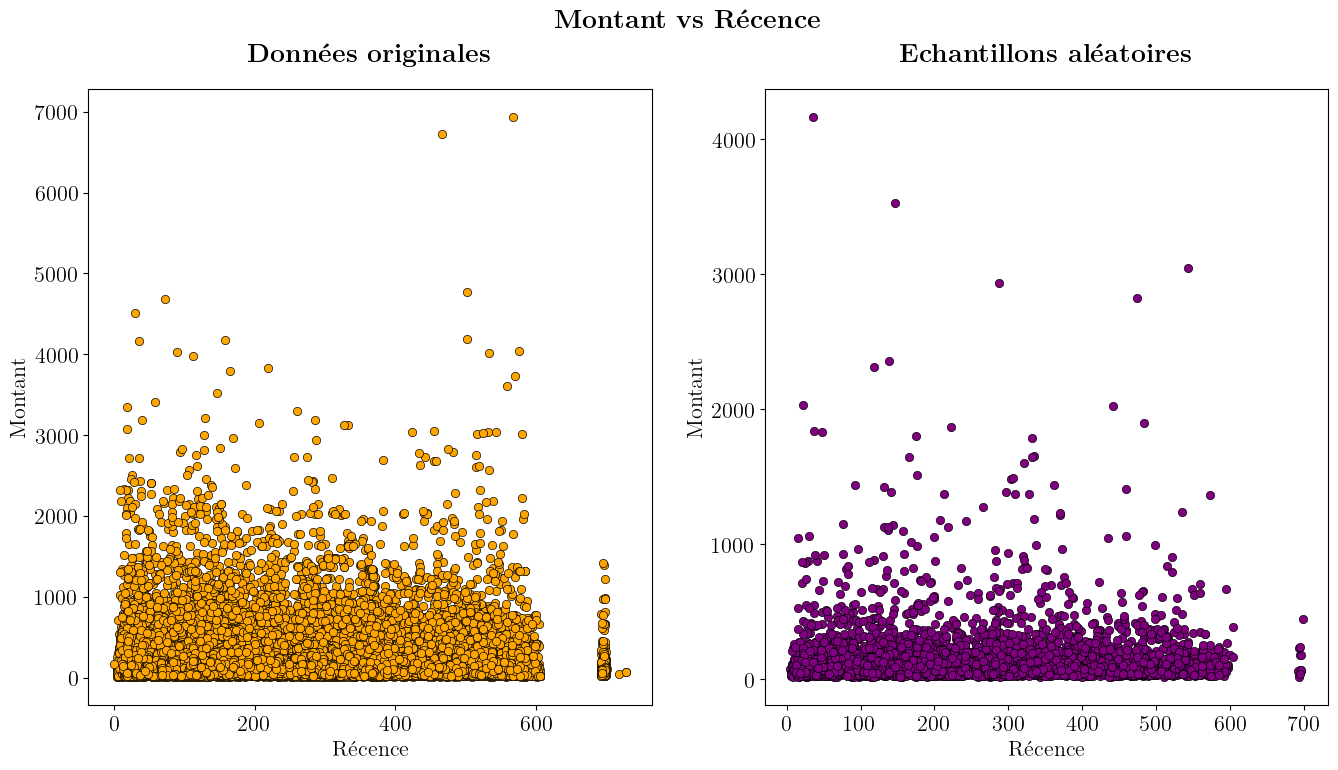

In [68]:
#On plot nos données X_bis et X côte à côte

fig, axes = plt.subplots(1,2, figsize = (16,8))
sns.scatterplot(x = data['recence'], y = data['montant'], color = 'orange', edgecolor = 'black', ax = axes[0])
sns.scatterplot(x = X['recence'], y = X['montant'], color = 'purple', edgecolor = 'black', ax = axes[1])
axes[0].set_title(f"\\textbf{{Données originales}}", pad = 20)
axes[1].set_title(f"\\textbf{{Echantillons aléatoires}}", pad = 20)
axes[0].set_xlabel('Récence')
axes[0].set_ylabel('Montant')
axes[1].set_xlabel('Récence')
axes[1].set_ylabel('Montant')
plt.suptitle(f"\\textbf{{Montant vs Récence}}")
plt.savefig(f"scatter_samples.pdf", bbox_inches='tight')
plt.show()

In [29]:
from sklearn import metrics

In [41]:
s_scores = []
n_clusters_list = []
n_noise_list = []
labels_dict = {}

s_scores_rs = []
n_clusters_list_rs = []
n_noise_list_rs = []
labels_dict_rs = {}

for n in range(2,20):
    #Initiatlisation de DBSCAN
    db = DBSCAN(eps = 0.6, min_samples = n)
    
    #Ajustement sur les données sans satisfaction
    db.fit(X_scaled)
    db_labels = db.labels_
    
    #Scores de silhouette, nombre de clusters et bruit
    s_score = silhouette_score(X_scaled, db_labels)
    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise = list(db_labels).count(-1)
    
    #On ajoute les données aux listes
    s_scores.append(s_score)
    n_clusters_list.append(n_clusters)
    n_noise_list.append(n_noise)
    
    #On sauvegarde nos labels dans un dictionnaire pour les futurs plots
    labels_dict[n] = db_labels.tolist()
    
    
    #Avec satisfaction
    db.fit(X_scaled_rs)
    db_labels_rs = db.labels_
    s_score_rs = silhouette_score(X_scaled_rs, db_labels_rs)
    n_clusters_rs = len(set(db_labels_rs)) - (1 if -1 in db_labels_rs else 0)
    n_noise_rs = list(db_labels_rs).count(-1)
    
    #On ajoute les données aux listes
    s_scores_rs.append(s_score_rs)
    n_clusters_list_rs.append(n_clusters_rs)
    n_noise_list_rs.append(n_noise_rs)
    
    #On sauvegarde nos labels dans un dictionnaire pour les futurs plots
    labels_dict_rs[n] = db_labels_rs.tolist()
    
#On rassemble tout dans un dataframe
df_db = pd.DataFrame()
df_db['min_samples'] = [i for i in range(2,20)]
df_db['nb_clusters'] = n_clusters_list
df_db['nb_bruit'] = n_noise_list
df_db['silhouette_score'] = s_scores

df_db_rs = pd.DataFrame()
df_db_rs['min_samples'] = [i for i in range(2,20)]
df_db_rs['nb_clusters'] = n_clusters_list_rs
df_db_rs['nb_bruit'] = n_noise_list_rs
df_db_rs['silhouette_score'] = s_scores_rs

In [43]:
#On affiche nos dataframes

df_db

,min_samples,nb_clusters,nb_bruit,silhouette_score
0,2,18,32,0.244000
1,3,11,46,0.245844
2,4,9,56,0.246323
3,5,7,74,0.265124
4,6,7,77,0.266255
5,7,7,79,0.265625
6,8,9,83,0.261130
7,9,7,102,0.268101
8,10,7,109,0.267629
9,11,8,114,0.258697


In [45]:
df_db_rs

,min_samples,nb_clusters,nb_bruit,silhouette_score
0,2,47,77,0.082878
1,3,30,111,0.084122
2,4,23,141,0.090166
3,5,15,196,0.136978
4,6,12,220,0.134511
5,7,11,241,0.126588
6,8,9,259,0.132720
7,9,10,271,0.127279
8,10,10,284,0.127186
9,11,10,297,0.124907


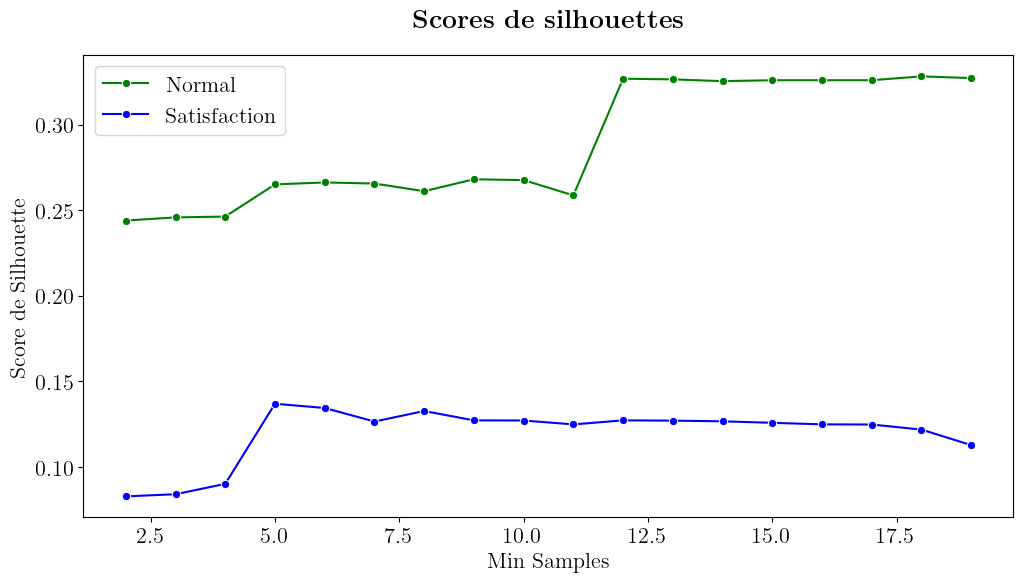

In [73]:
plt.figure(figsize = (12,6))

sns.lineplot(x = df_db['min_samples'], y = df_db['silhouette_score'], color = 'green', label = 'Normal', marker = 'o')
sns.lineplot(x = df_db_rs['min_samples'], y = df_db_rs['silhouette_score'], color = 'blue', label = 'Satisfaction', marker = 'o')
plt.xlabel('Min Samples')
plt.ylabel('Score de Silhouette')
plt.title("\\textbf{{Scores de silhouettes}}", pad = 20)
plt.legend()
plt.savefig(f"lineplot_dbscan_silhouette.pdf", bbox_inches='tight')
plt.show()

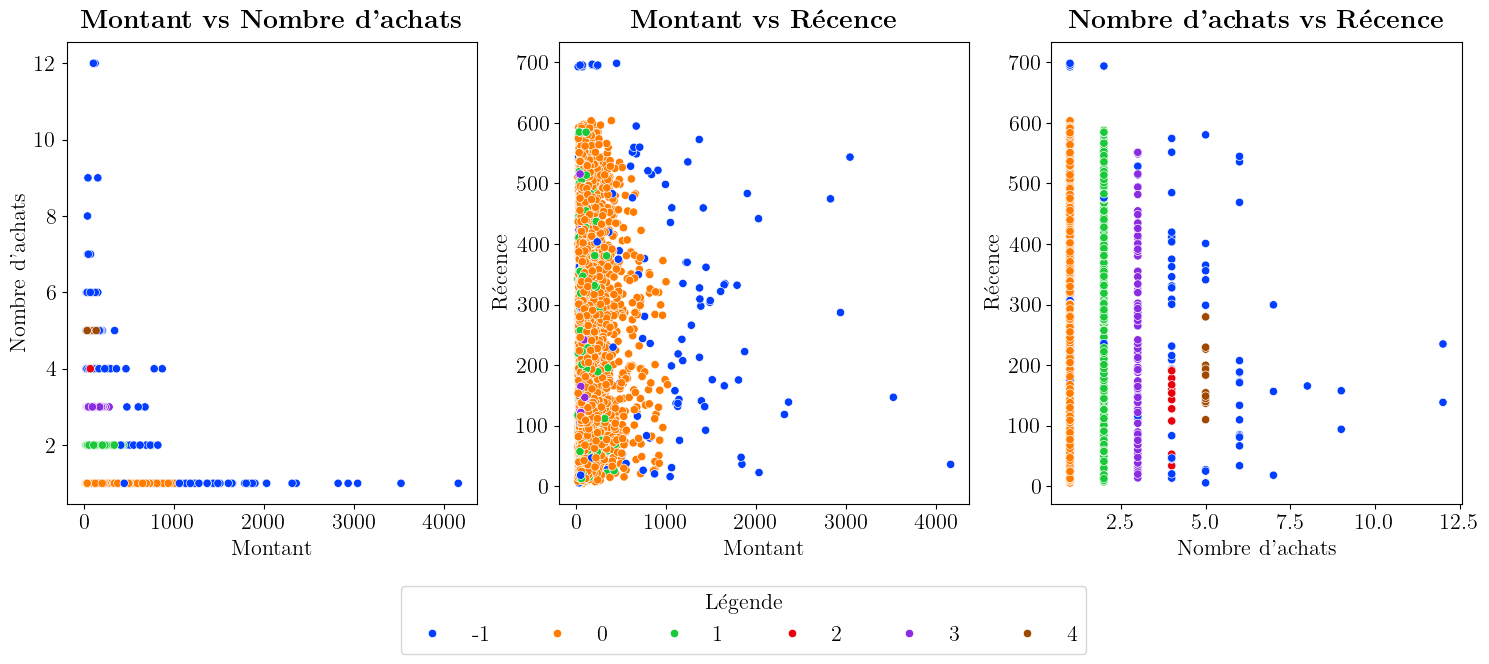

In [76]:
#n = 12 et sans satisfaction

fig, axes = plt.subplots(1,3, figsize = (18,6))

sns.scatterplot(x=X['montant'], y=X['nb_achats'], hue=labels_dict[12], palette='bright', legend = False, ax = axes[0])
sns.scatterplot(x=X['montant'], y=X['recence'], hue=labels_dict[12], palette='bright', legend = False, ax = axes[1])
sns.scatterplot(x=X['nb_achats'], y=X['recence'], hue=labels_dict[12], palette='bright', ax = axes[2])
axes[0].set_title(f"\\textbf{{Montant vs Nombre d'achats}}", pad =  10)
axes[1].set_title(f"\\textbf{{Montant vs Récence}}", pad = 10)
axes[2].set_title(f"\\textbf{{Nombre d'achats vs Récence}}", pad = 10)
axes[0].set_xlabel('Montant')
axes[1].set_xlabel('Montant')
axes[2].set_xlabel("Nombre d'achats")
axes[0].set_ylabel("Nombre d'achats")
axes[1].set_ylabel('Récence')
axes[2].set_ylabel("Récence")
plt.legend(loc = 'center', bbox_to_anchor = (-0.75, -0.25), title = "Légende", ncol = 8, fontsize = 16)
plt.savefig(f"scatter_dbscan.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [78]:
X['db_labels'] = labels_dict[12]

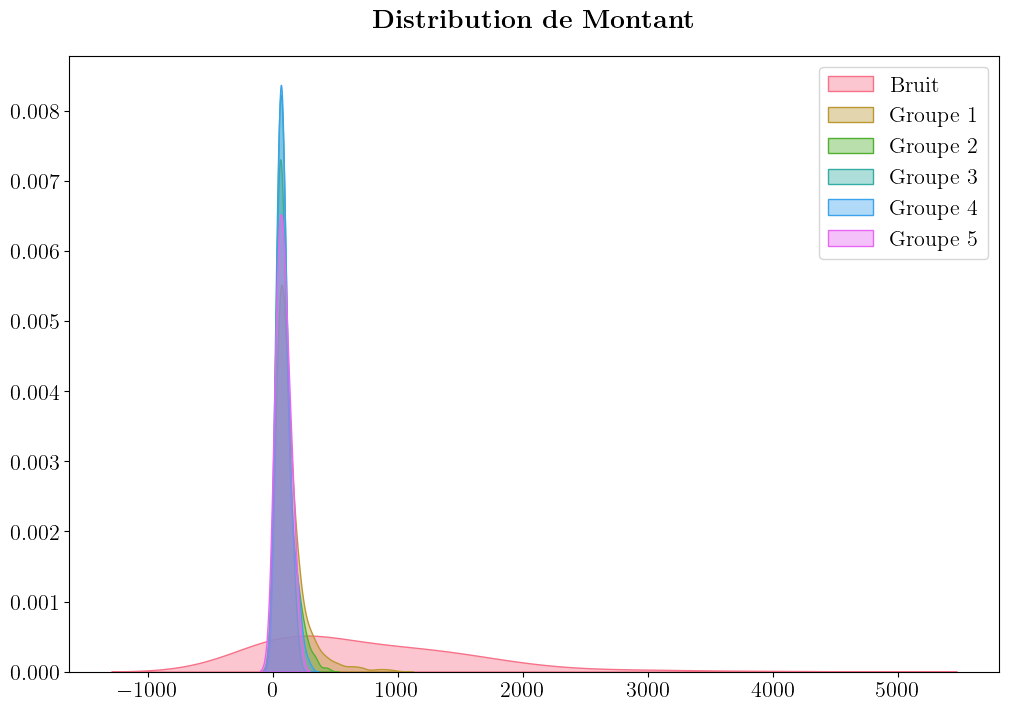

____________________________________________________________________________________________________




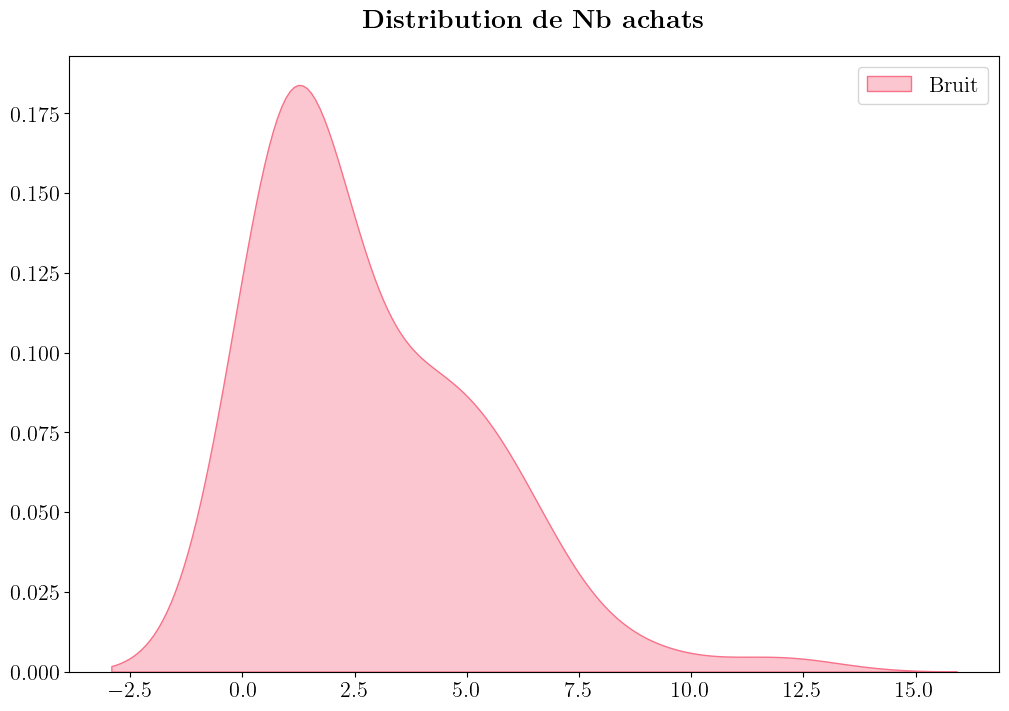

____________________________________________________________________________________________________




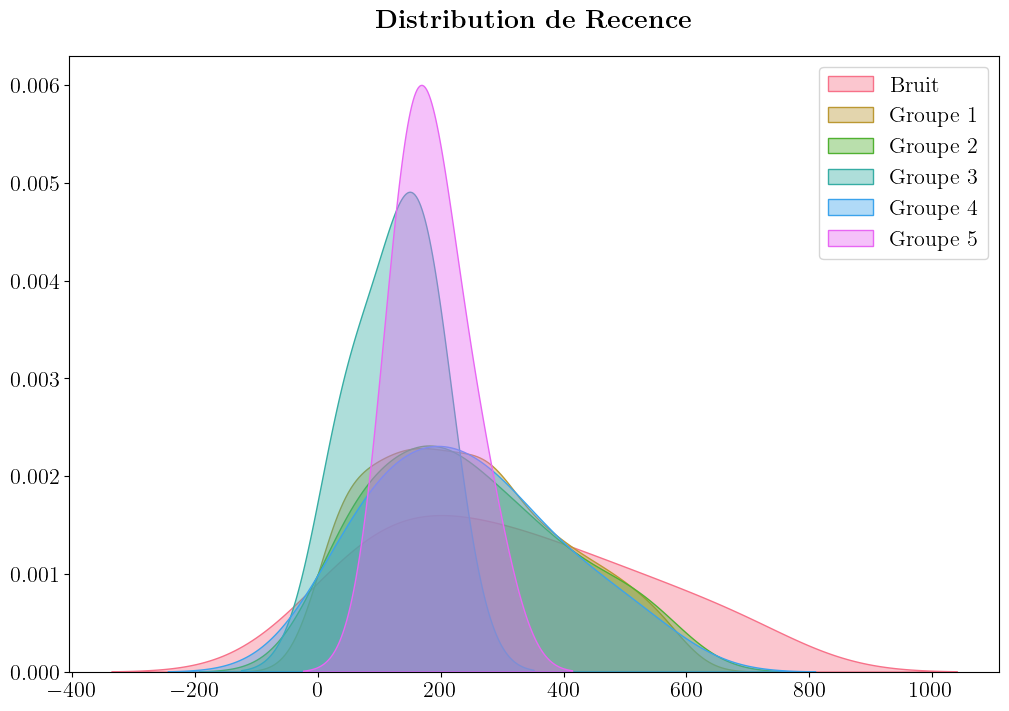

____________________________________________________________________________________________________




In [80]:
#On plot les distributions par cluster (sans satisfaction)

for feature in features:
    palette = sns.color_palette("husl", 6)
    plt.figure(figsize=(12,8))
    for i, group in enumerate(X['db_labels'].sort_values().unique()):
        groupe = group + 1 if group != -1 else 'Noise'
        x = X.loc[X['db_labels'] == group, feature]
        sns.kdeplot(data = x, fill = True , alpha = 0.4, bw_adjust = 1.5, label = f"Groupe {groupe}" if groupe !='Noise' else 'Bruit', color = palette[i], legend = True, warn_singular = False)
    plt.title(f"\\textbf{{Distribution de {feature.capitalize().replace('_', ' ')}}}", pad = 20)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.savefig(f"dist_dbscan_{feature.replace('_','')}.pdf", bbox_inches='tight')
    plt.show()
    print('_' * 100)
    print('\n')

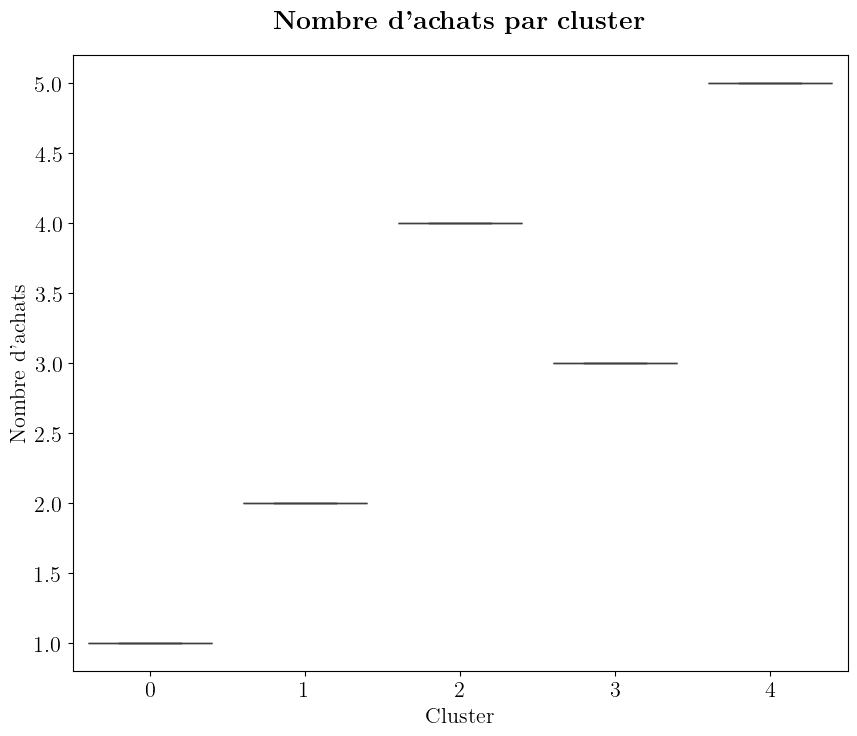

In [82]:
#Boxplots nombre d'achats par cluster

plt.figure(figsize = (10,8))
sns.boxplot(x = 'db_labels', y = 'nb_achats', data = X.loc[X['db_labels'] != -1, :])
plt.xlabel('Cluster')
plt.ylabel("Nombre d'achats")
plt.title(f"\\textbf{{Nombre d'achats par cluster}}", pad = 20)
plt.savefig(f"boxplot_dbscan_nbachats.pdf", bbox_inches='tight')
plt.show()

## 4 - CLUSTERING HIERARCHIQUE
***

In [47]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

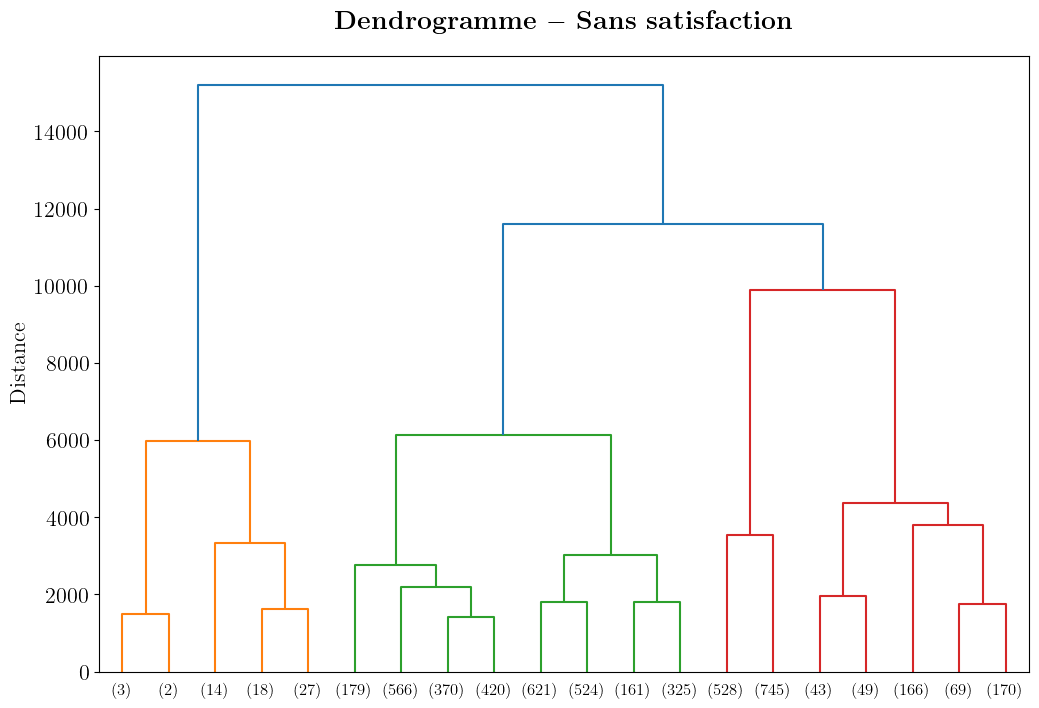

In [49]:
#Dendrogramme sans satisfaction

Z = linkage(X.iloc[:,:3], method = 'ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, p = 20, truncate_mode = 'lastp')
plt.title('\\textbf{{Dendrogramme $-$ Sans satisfaction}}', pad = 20)
plt.xlabel('')
plt.ylabel('Distance')
plt.savefig(f"hierarchical_dendrogram1.pdf", bbox_inches='tight')
plt.show()

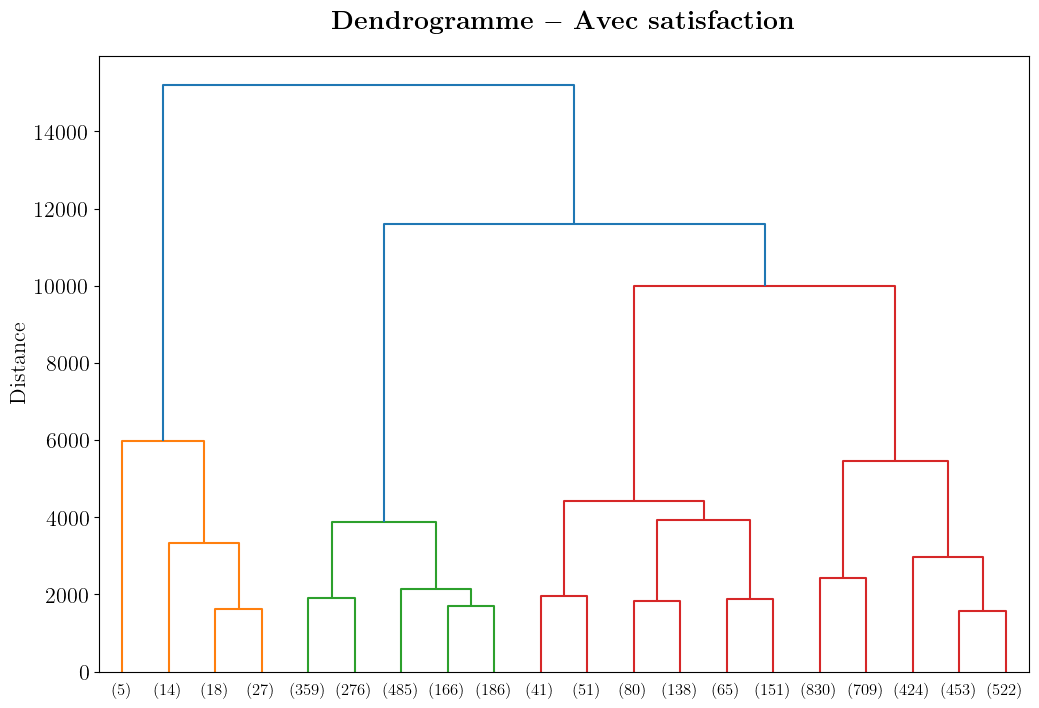

In [51]:
#Dendrogramme avec satisfaction

Z_rs = linkage(X.iloc[:,:4], method = 'ward')

plt.figure(figsize=(12, 8))
dendrogram(Z_rs, p = 20, truncate_mode = 'lastp')
plt.title('\\textbf{{Dendrogramme $-$ Avec satisfaction}}', pad = 20)
plt.xlabel('')
plt.ylabel('Distance')
plt.savefig(f"hierarchical_dendrogram2.pdf", bbox_inches='tight')
plt.show()

In [53]:
df_hierarchical = pd.DataFrame()
silhouette_scores_hierarchical = []
silhouette_scores_hierarchical_rs = []
labels_hierarchical_dict = {}
labels_hierarchical_dict_rs = {}

for n in range(2,20):
    labels = fcluster(Z, n, criterion = 'maxclust')
    labels_rs = fcluster(Z_rs, n, criterion = 'maxclust')
    s = silhouette_score(X.iloc[:,:3], labels).round(3)
    s_rs = silhouette_score(X.iloc[:,:4], labels_rs).round(3)
    silhouette_scores_hierarchical.append(s)
    silhouette_scores_hierarchical_rs.append(s_rs)
    labels_hierarchical_dict[n] = labels.tolist()
    labels_hierarchical_dict_rs[n] = labels_rs.tolist()

df_hierarchical['nb_clusters'] = [i for i in range(2,20)]
df_hierarchical['silhouette_score_normal'] = silhouette_scores_hierarchical
df_hierarchical['silhouette_score_rs'] = silhouette_scores_hierarchical_rs

In [55]:
#On affiche le dataframe

df_hierarchical

,nb_clusters,silhouette_score_normal,silhouette_score_rs
0,2,0.817,0.817
1,3,0.417,0.378
2,4,0.450,0.448
3,5,0.360,0.449
4,6,0.361,0.335
5,7,0.365,0.340
6,8,0.367,0.350
7,9,0.344,0.329
8,10,0.345,0.330
9,11,0.349,0.322


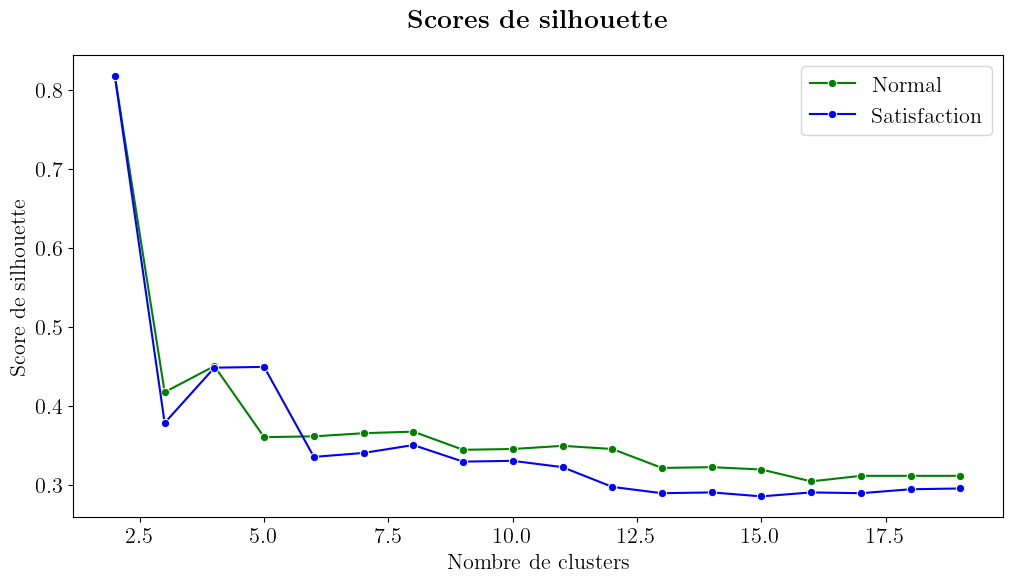

In [93]:
plt.figure(figsize = (12,6))

sns.lineplot(x = df_hierarchical['nb_clusters'], y = df_hierarchical['silhouette_score_normal'], marker = 'o', color = 'green', label = 'Normal')
sns.lineplot(x = df_hierarchical['nb_clusters'], y = df_hierarchical['silhouette_score_rs'], marker = 'o', color = 'blue', label = 'Satisfaction')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.title("\\textbf{{Scores de silhouette}}", pad = 20)
plt.savefig(f"lineplot_hierarchical_silhouette.pdf", bbox_inches='tight')
plt.legend()
plt.show()

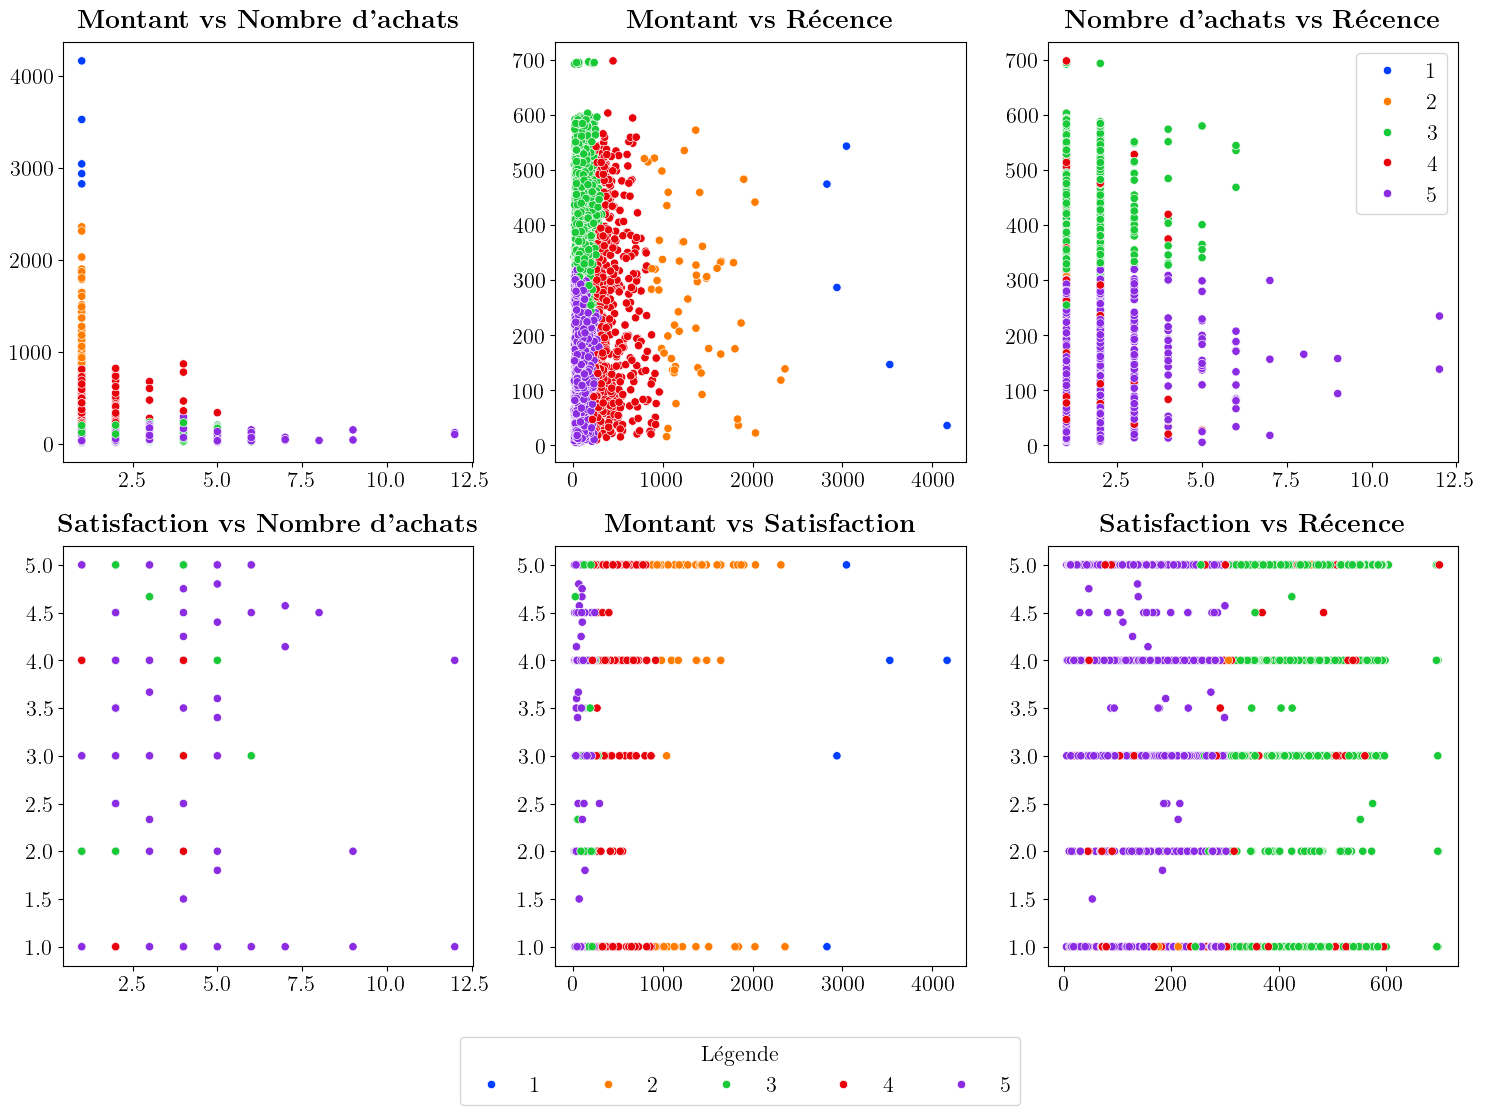

In [95]:
#On choisit 5 clusters avec satisfaction

fig, axes = plt.subplots(2,3, figsize = (18,12))

sns.scatterplot(x=X['nb_achats'], y=X['montant'], hue=labels_hierarchical_dict_rs[5], palette='bright', legend = False, ax = axes[0,0])
sns.scatterplot(x=X['montant'], y=X['recence'], hue=labels_hierarchical_dict_rs[5], palette='bright', legend = False, ax = axes[0,1])
sns.scatterplot(x=X['nb_achats'], y=X['recence'], hue=labels_hierarchical_dict_rs[5], palette='bright', ax = axes[0,2])

sns.scatterplot(x=X['nb_achats'], y=X['satisfaction'], hue=labels_hierarchical_dict_rs[5], palette='bright', legend = False, ax = axes[1,0])
sns.scatterplot(x=X['montant'], y=X['satisfaction'], hue=labels_hierarchical_dict_rs[5], palette='bright', legend = False, ax = axes[1,1])
sns.scatterplot(x=X['recence'], y=X['satisfaction'], hue=labels_hierarchical_dict_rs[5], palette='bright', ax = axes[1,2])

axes[0,0].set_title(f"\\textbf{{Montant vs Nombre d'achats}}", pad =  10)
axes[0,1].set_title(f"\\textbf{{Montant vs Récence}}", pad = 10)
axes[0,2].set_title(f"\\textbf{{Nombre d'achats vs Récence}}", pad = 10)

axes[1,0].set_title(f"\\textbf{{Satisfaction vs Nombre d'achats}}", pad =  10)
axes[1,1].set_title(f"\\textbf{{Montant vs Satisfaction}}", pad = 10)
axes[1,2].set_title(f"\\textbf{{Satisfaction vs Récence}}", pad = 10)

axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_xlabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')
axes[1,2].set_xlabel('')
axes[1,2].set_ylabel('')

plt.legend(loc = 'center', bbox_to_anchor = (-0.75, -0.25), title = "Légende", ncol = 5, fontsize = 16)
#plt.tight_layout()
plt.savefig(f"scatter_hierarchical.pdf", bbox_inches='tight')
plt.show()